In [201]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
import treemap, drawing
import tree as tr

In [203]:
import pandas as pd
import numpy as np

In [204]:
filename_data="./data/reveal_EEO1_2016-small.csv"

## Task0

In [206]:
eeo_data = pd.read_csv(filename_data, keep_default_na=False)

# exclude job_category in 'Totals', 'Previous_totals'
eeo_data = eeo_data[~eeo_data['job_category'].isin(['Totals', 'Previous_totals'])]

# exclude race in 'Overall_totals'
eeo_data = eeo_data[~eeo_data['race'].isin(['Overall_totals'])]

# convert count to number
eeo_data['count']= pd.to_numeric(eeo_data['count'], errors='coerce').astype(np.int64)

eeo_data.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [207]:
companies = eeo_data.company.unique()
num_companies = companies.shape[0]
print("Number of Companies={}\nThey are:\n {}".format(num_companies, companies))

Number of Companies=3
They are:
 ['23andMe' 'Adobe' 'Airbnb']


In [208]:
eeo_data.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [209]:
# total count
sum(eeo_data['count'])

9376

In [210]:
eeo_data.groupby(['gender']).agg({'count':['sum']})

,count
,sum
gender,
female,3274
male,6102


In [211]:
eeo_data.groupby(['race']).agg({'count':['sum']})

,count
,sum
race,
American_Indian_Alaskan_Native,20
Asian,2494
Black_or_African_American,178
Hispanic_or_Latino,477
Native_Hawaiian_or_Pacific_Islander,33
Two_or_more_races,150
White,6024


In [212]:
eeo_data.groupby(['job_category']).agg({'count':['sum']})

,count
,sum
job_category,
Administrative support,704
Craft workers,0
Executives,207
Managers,2808
Professionals,4332
Sales workers,1270
Service workers,49
Technicians,6


## Task1

In [232]:
eeo_data = pd.read_csv(filename_data, keep_default_na=False)

# exclude job_category in 'Totals', 'Previous_totals'
eeo_data = eeo_data[~eeo_data['job_category'].isin(['Totals', 'Previous_totals'])]

# exclude race in 'Overall_totals'
eeo_data = eeo_data[~eeo_data['race'].isin(['Overall_totals'])]

# convert count to number
eeo_data['count']= pd.to_numeric(eeo_data['count'], errors='coerce').astype(np.int64)

eeo_data.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [233]:
eeo_tree = tr.data_to_tree(eeo_data, ["company", "gender"])

eeo_tree.print()



  │
  ├──23andMe
  │  │
  │  ├──male: 148
  │  │
  │  └──female: 149
  │
  ├──Adobe
  │  │
  │  ├──male: 4859
  │  │
  │  └──female: 2303
  │
  └──Airbnb
     │
     ├──male: 1095
     │
     └──female: 822


In [234]:
eeo_tree2 = tr.data_to_tree(eeo_data, ["company", "job_category", "race", "gender"])
eeo_tree2.print()



  │
  ├──23andMe
  │  │
  │  ├──Executives
  │  │  │
  │  │  ├──Hispanic_or_Latino
  │  │  │  │
  │  │  │  ├──male: 0
  │  │  │  │
  │  │  │  └──female: 0
  │  │  │
  │  │  ├──White
  │  │  │  │
  │  │  │  ├──male: 9
  │  │  │  │
  │  │  │  └──female: 7
  │  │  │
  │  │  ├──Black_or_African_American
  │  │  │  │
  │  │  │  ├──male: 0
  │  │  │  │
  │  │  │  └──female: 0
  │  │  │
  │  │  ├──Native_Hawaiian_or_Pacific_Islander
  │  │  │  │
  │  │  │  ├──male: 0
  │  │  │  │
  │  │  │  └──female: 0
  │  │  │
  │  │  ├──Asian
  │  │  │  │
  │  │  │  ├──male: 0
  │  │  │  │
  │  │  │  └──female: 1
  │  │  │
  │  │  ├──American_Indian_Alaskan_Native
  │  │  │  │
  │  │  │  ├──male: 0
  │  │  │  │
  │  │  │  └──female: 0
  │  │  │
  │  │  └──Two_or_more_races
  │  │     │
  │  │     ├──male: 0
  │  │     │
  │  │     └──female: 0
  │  │
  │  ├──Managers
  │  │  │
  │  │  ├──Hispanic_or_Latino
  │  │  │  │
  │  │  │  ├──male: 1
  │  │  │  │
  │  │  │  └──female: 1
  │  │  │
  │  │  ├──White

In [186]:
def compute_internal_counts(t):
    '''
    Assign a count to the interior nodes.  The count of the leaves
    should already be set.  The count of an internal node is the sum
    of the counts of its children.

    Inputs:
        t (Tree): a tree

    Returns:
        The input tree t should be modified so that every internal node's
        count is set to be the sum of the counts of its children.

        The return value will be:
        - If the tree has no children: the value of the count attribute
        - If the tree has children: the sum of the counts of the children
    '''

    if t.num_children() < 1:
        return t.count
    node_sum = 0
    for ctr in t.children:
        node_sum += compute_internal_counts(ctr)
    t.count = node_sum
    return node_sum

In [187]:
def compute_verbose_labels(t, prefix=None):
    '''
    Assign a verbose label to non-root nodes. Verbose labels contain the 
    full path to that node through the tree. For example, following the 
    path "Google" --> "female" --> "white" should create the verbose label 
    "Google: female: white"

    Inputs:
        t (Tree): a tree

    Outputs:
        Nothing. The input tree t should be modified to contain
            verbose labels for all non-root nodes


    '''

        
    for ctr in t.children:
        ctr.label = (prefix + ': ' + ctr.label) if prefix else ctr.label
        compute_verbose_labels(ctr, prefix=ctr.label)

    # Do not modify this return statement.
    # This function doesn't return anything!
    return None

In [188]:
compute_internal_counts(eeo_tree)

compute_verbose_labels(eeo_tree)

eeo_tree.print()


: 9376
  │
  ├──23andMe: 297
  │  │
  │  ├──23andMe: male: 148
  │  │
  │  └──23andMe: female: 149
  │
  ├──Adobe: 7162
  │  │
  │  ├──Adobe: male: 4859
  │  │
  │  └──Adobe: female: 2303
  │
  └──Airbnb: 1917
     │
     ├──Airbnb: male: 1095
     │
     └──Airbnb: female: 822


In [189]:
compute_internal_counts(eeo_tree2)

compute_verbose_labels(eeo_tree2)

eeo_tree2.print()


: 9376
  │
  ├──23andMe: 297
  │  │
  │  ├──23andMe: Executives: 17
  │  │  │
  │  │  ├──23andMe: Executives: Hispanic_or_Latino: 0
  │  │  │  │
  │  │  │  ├──23andMe: Executives: Hispanic_or_Latino: male: 0
  │  │  │  │
  │  │  │  └──23andMe: Executives: Hispanic_or_Latino: female: 0
  │  │  │
  │  │  ├──23andMe: Executives: White: 16
  │  │  │  │
  │  │  │  ├──23andMe: Executives: White: male: 9
  │  │  │  │
  │  │  │  └──23andMe: Executives: White: female: 7
  │  │  │
  │  │  ├──23andMe: Executives: Black_or_African_American: 0
  │  │  │  │
  │  │  │  ├──23andMe: Executives: Black_or_African_American: male: 0
  │  │  │  │
  │  │  │  └──23andMe: Executives: Black_or_African_American: female: 0
  │  │  │
  │  │  ├──23andMe: Executives: Native_Hawaiian_or_Pacific_Islander: 0
  │  │  │  │
  │  │  │  ├──23andMe: Executives: Native_Hawaiian_or_Pacific_Islander: male: 0
  │  │  │  │
  │  │  │  └──23andMe: Executives: Native_Hawaiian_or_Pacific_Islander: female:
  │  │  │     0
  │  │  │
 

## Task 2  - prune tree

In [223]:
eeo_data = pd.read_csv(filename_data, keep_default_na=False)

# exclude job_category in 'Totals', 'Previous_totals'
eeo_data = eeo_data[~eeo_data['job_category'].isin(['Totals', 'Previous_totals'])]

# exclude race in 'Overall_totals'
eeo_data = eeo_data[~eeo_data['race'].isin(['Overall_totals'])]

# convert count to number
eeo_data['count']= pd.to_numeric(eeo_data['count'], errors='coerce').astype(np.int64)

eeo_data.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [225]:
eeo_data = pd.read_csv(filename_data, keep_default_na=False)

# exclude job_category in 'Totals', 'Previous_totals'
eeo_data = eeo_data[~eeo_data['job_category'].isin(['Totals', 'Previous_totals'])]

# exclude race in 'Overall_totals'
eeo_data = eeo_data[~eeo_data['race'].isin(['Overall_totals'])]

# convert count to number
eeo_data['count']= pd.to_numeric(eeo_data['count'], errors='coerce').astype(np.int64)


In [226]:
eeo_tree = tr.data_to_tree(eeo_data, ["company", "gender"])

eeo_tree.print()



  │
  ├──23andMe
  │  │
  │  ├──male: 148
  │  │
  │  └──female: 149
  │
  ├──Adobe
  │  │
  │  ├──male: 4859
  │  │
  │  └──female: 2303
  │
  └──Airbnb
     │
     ├──male: 1095
     │
     └──female: 822


In [229]:
def __prune_tree(t, values_to_discard):
    children = []
    for ch in t.children:
        if ch.label not in values_to_discard:
            children.append(__prune_tree(ch, values_to_discard))
            
    t.children = children if len(children) else None

    return t    
    
def prune_tree(t, values_to_discard):
    '''
    Returns a tree with any node whose label is in the list values_to_discard
    (and thus all of its children) pruned. This function should return a copy
    of the original tree and should not destructively modify the original tree.
    The pruning step must be recursive.

    Inputs:
        t (Tree): a tree
        values_to_discard (list of strings): A list of strings specifying the
                  labels of nodes to discard

    Returns: a new Tree object representing the pruned tree
    '''
    import copy
    
    pruned_tr = copy.deepcopy(t)
        
    children = []
    for ch in pruned_tr.children:
        if ch.label not in values_to_discard:
            children.append(__prune_tree(ch, values_to_discard))
    pruned_tr.children = children if len(children) else None

    ### Replace t with the appropriate return value
    return pruned_tr

In [231]:
prune_tree(eeo_tree,['Adobe','female']).print()



  │
  ├──23andMe
  │  │
  │  └──male: 148
  │
  └──Airbnb
     │
     └──male: 1095


## Task 3  - Drawing treemap

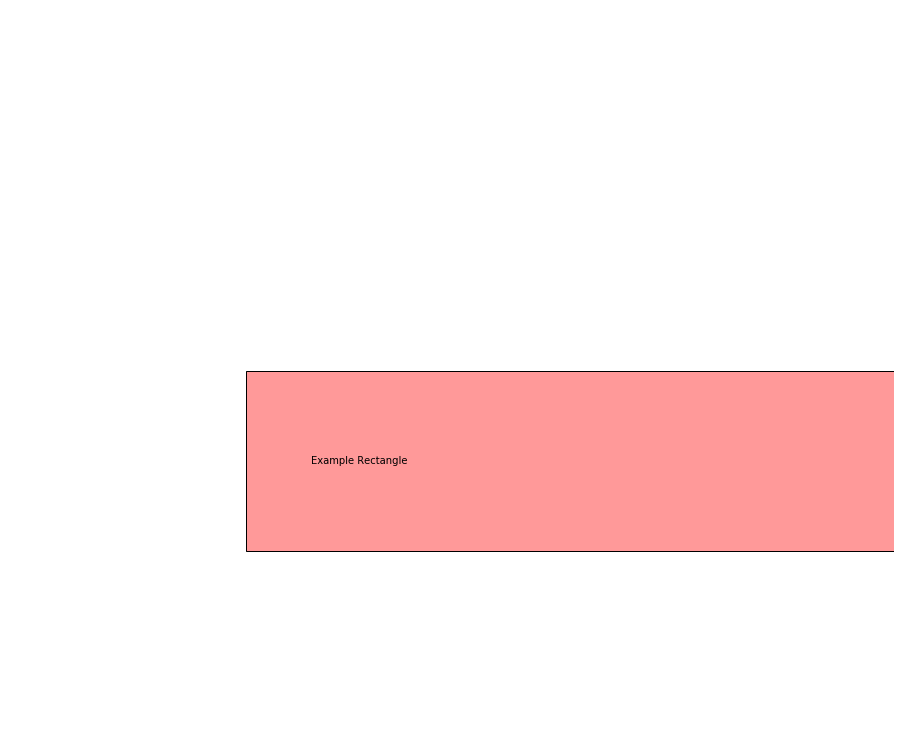

In [235]:
r = treemap.Rectangle((0.25,0.5), (0.75, 0.25), "Example", "Example Rectangle")

drawing.draw_rectangles([r])

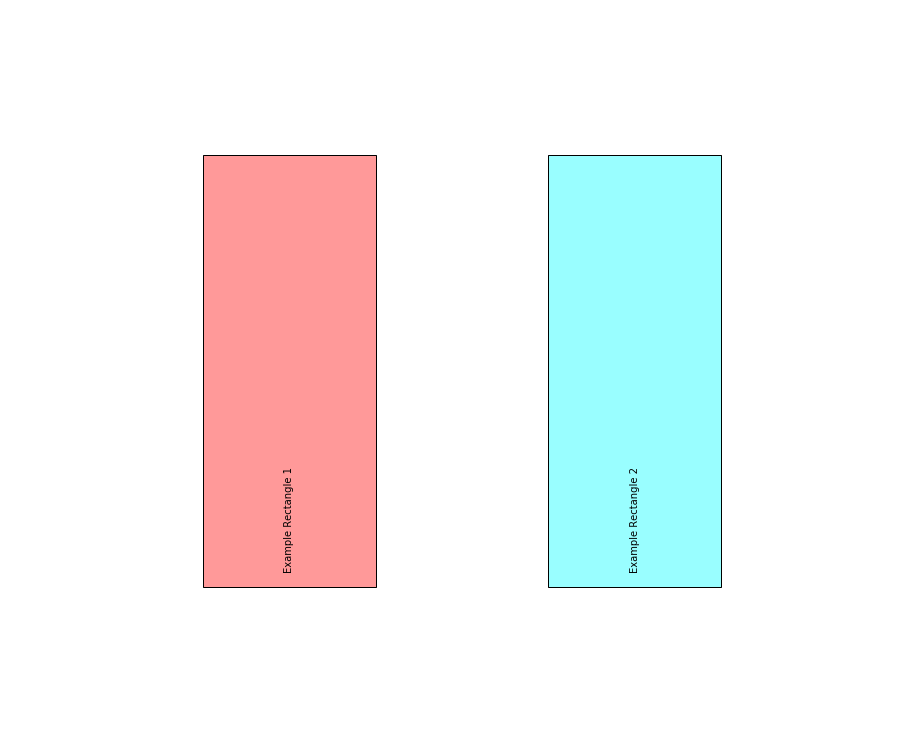

In [236]:
r1 = treemap.Rectangle((0.20,0.20), (0.20, 0.60), "Example 1", "Example Rectangle 1")

r2 = treemap.Rectangle((0.60,0.20), (0.20, 0.60), "Example 2", "Example Rectangle 2")

drawing.draw_rectangles([r1, r2])